### Image Classification using Logistic Regression 

In [5]:
path = "images/train/clean/24.png"

In [7]:
## python -m pip install python-opencv 

In [6]:
import cv2

In [18]:
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [19]:
type(img)

numpy.ndarray

In [20]:
from PIL import Image

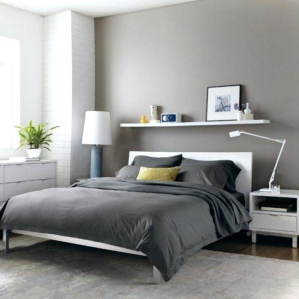

In [25]:
Image.open(path)

In [26]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline 

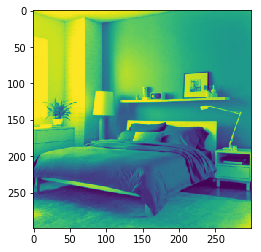

In [27]:
plt.imshow(img)

In [28]:
# resize 2D --> 128x128 
# (r+g+b)/3 --> numpy 

In [29]:
img.shape

(299, 299)

In [31]:
img = cv2.resize(img,(128,128))

In [32]:
img.shape

(128, 128)

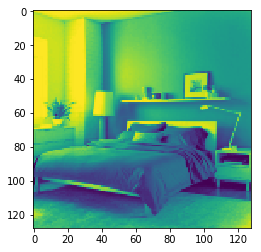

In [33]:
plt.imshow(img)
plt.show()

In [35]:
import os 

path = "images\\train\\clean"
os.listdir(path)

In [41]:
clean_images = []
path = "images\\train\\clean"
for image in os.listdir(path):
    full_path = os.path.join(path,image)
    img = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128,128))
    clean_images.append(img)
    

In [43]:
clean = np.concatenate(clean_images)

In [44]:
clean.shape

(12288, 128)

In [45]:
df1 = pd.DataFrame(clean)

In [46]:
df1.shape

(12288, 128)

In [47]:
#### clean ---> 0 
#### messy ---> 1
df1['label'] = 0

In [48]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,106,88,83,71,62,60,57,61,71,79,...,89,65,75,131,150,112,27,88,109,0
1,115,119,115,112,108,102,101,106,104,94,...,145,78,74,155,155,119,29,86,112,0
2,117,121,119,120,120,120,118,119,118,117,...,146,129,94,145,161,123,30,86,114,0
3,112,122,116,113,98,98,118,120,121,119,...,134,143,161,148,157,130,32,87,117,0
4,97,115,119,116,48,46,117,117,116,119,...,149,148,135,164,153,134,33,90,118,0


In [49]:
messy_images = []
path = "images\\train\\messy"
for image in os.listdir(path):
    full_path = os.path.join(path,image)
    img = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128,128))
    messy_images.append(img)
messy = np.concatenate(messy_images)
df2 = pd.DataFrame(messy)
df2['label'] = 1

In [50]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,203,202,196,196,195,201,125,100,135,191,...,4,10,5,3,5,0,1,0,0,1
1,203,202,204,201,204,197,173,85,50,166,...,2,28,30,5,4,1,0,0,0,1
2,213,215,219,220,216,212,204,73,67,140,...,9,84,63,8,0,1,0,1,0,1
3,220,221,221,221,221,213,226,73,64,101,...,24,124,59,12,3,8,6,3,1,1
4,221,221,222,222,222,213,221,121,61,66,...,59,147,80,30,25,55,18,14,41,1


In [51]:
df = pd.concat([ df1, df2])

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,106,88,83,71,62,60,57,61,71,79,...,89,65,75,131,150,112,27,88,109,0
1,115,119,115,112,108,102,101,106,104,94,...,145,78,74,155,155,119,29,86,112,0
2,117,121,119,120,120,120,118,119,118,117,...,146,129,94,145,161,123,30,86,114,0
3,112,122,116,113,98,98,118,120,121,119,...,134,143,161,148,157,130,32,87,117,0
4,97,115,119,116,48,46,117,117,116,119,...,149,148,135,164,153,134,33,90,118,0


In [53]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
12283,36,35,32,28,19,16,16,14,15,15,...,64,58,58,20,18,19,28,26,75,1
12284,45,44,38,30,30,22,19,17,34,15,...,54,51,70,67,22,22,21,20,19,1
12285,40,38,28,29,29,27,19,21,31,26,...,49,49,56,71,78,26,19,19,20,1
12286,35,31,35,36,30,29,26,31,37,14,...,50,65,55,54,72,82,31,20,19,1
12287,18,26,23,19,13,16,16,12,8,4,...,5,50,66,57,53,68,80,45,17,1


In [54]:
df.shape

(24576, 129)

In [55]:
features = df.drop("label",axis=1)
target = df['label']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(features,target)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
confusion_matrix(y_test,y_pred)

array([[1937, 1136],
       [1072, 1999]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.640625

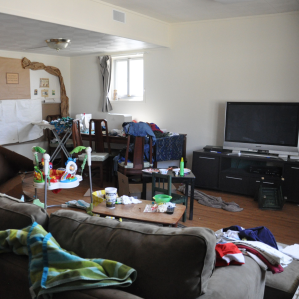

In [67]:
Image.open("images/test/5.png")

In [68]:
path = "images/test/5.png"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(128,128))

In [69]:
img.shape

(128, 128)

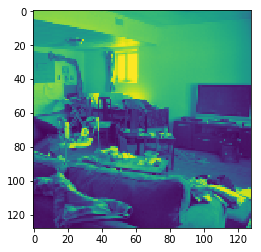

In [70]:
plt.imshow(img)
plt.show()

In [71]:
prediction = model.predict(img)

In [72]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [73]:
# 0 --> clean 
# 1 --> messy 

In [76]:
np.mean(prediction == 0 )

0.3984375

In [77]:
np.mean(prediction == 1)

0.6015625

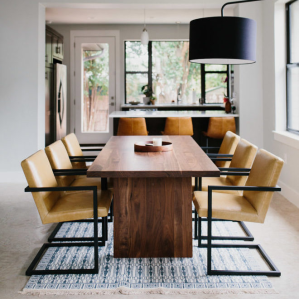

In [78]:
Image.open("images/test/3.png")

In [79]:
path = "images/test/3.png"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(128,128))

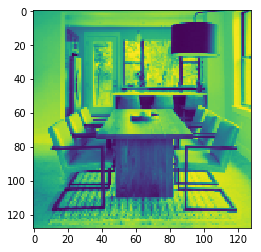

In [80]:
plt.imshow(img)
plt.show()

In [81]:
prediction = model.predict(img)

In [82]:
## clean
np.mean(prediction == 0 )

0.8515625

In [83]:
## messy 
np.mean(prediction == 1 )

0.1484375